# ПЕРВОЕ ЗНАКОМСТВО С ДАННЫМИ

In [1]:
#импортируем необходимые библиотеки и модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold
)
from sklearn.ensemble import (
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sns.set_theme(style="whitegrid")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#запишем датасеты в переменные
gender_train = pd.read_csv("/Users/rostislavorlov/Downloads/gender_train.csv")
tr_mcc_codes = pd.read_csv("/Users/rostislavorlov/Downloads/tr_mcc_codes.csv", on_bad_lines='skip', sep = ";")
tr_types = pd.read_csv("/Users/rostislavorlov/Downloads/tr_types.csv", sep = ";")
transactions = pd.read_csv("/Users/rostislavorlov/Downloads/transactions.csv")

In [3]:
gender_train.head(10)

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
5,44160317,1
6,36008593,0
7,48111232,1
8,82609845,0
9,60046355,1


In [4]:
tr_mcc_codes.head(10)

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
5,3000,"Авиалинии, авиакомпании"
6,3351,Агентства по аренде автомобилей
7,3501,"Жилье — отели, мотели, курорты"
8,4111,Транспортировка — пригородные и локальные сезо...
9,4112,Пассажирские железные перевозки


In [5]:
tr_types.head(10)

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
5,4010,Плата за получение наличных в АТМ Сбербанка
6,4011,Плата за получение наличных в АТМ Сбербанка (в...
7,4020,Плата за получение наличных через POS в Сбербанке
8,4021,Плата за получение наличных через POS в Сберба...
9,4030,Плата за взнос наличных через АТМ (в своем тер...


In [6]:
transactions.head(10)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
5,39026145,2 15:53:49,5541,1010,-14643.37,NaN
6,39026145,3 15:29:08,5499,1010,-1010.66,NaN
7,39026145,4 12:11:57,5200,1010,-2829.85,NaN
8,39026145,5 15:19:19,5499,1010,-628.86,NaN
9,39026145,6 07:08:31,4814,1030,-5614.79,NaN


In [7]:
#объединим датасеты в один
df = (
    transactions
    .merge(gender_train, on = 'customer_id', how = 'left')
    .merge(tr_mcc_codes, on = 'mcc_code', how = 'left')
    .merge(tr_types, on = 'tr_type', how = 'left')
)

In [8]:
df.head(10)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
5,39026145,2 15:53:49,5541,1010,-14643.37,NaN,1.0,Станции техобслуживания,Покупка. POS ТУ СБ РФ
6,39026145,3 15:29:08,5499,1010,-1010.66,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
7,39026145,4 12:11:57,5200,1010,-2829.85,NaN,1.0,Товары для дома,Покупка. POS ТУ СБ РФ
8,39026145,5 15:19:19,5499,1010,-628.86,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
9,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


In [9]:
df.loc[(df['mcc_description'] == 'Финансовые институты — снятие наличности автоматически')
       & 
       (df['amount'] < 0)]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
13,39026145,8 06:55:51,6011,2010,-4491.83,NaN,1.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
18,39026145,11 08:50:03,6011,2010,-44918.32,NaN,1.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
19,39026145,11 14:11:48,6011,2010,-4491.83,NaN,1.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
23,39026145,13 11:19:03,6011,2010,-145984.53,NaN,1.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
24,39026145,13 14:06:46,6011,2010,-898366.31,NaN,1.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
...,...,...,...,...,...,...,...,...,...
6849201,61870738,374 19:00:55,6011,2010,-4491.83,745717,0.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
6849206,61870738,377 10:13:11,6011,2010,-33688.74,582860,0.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
6849235,61870738,412 15:31:42,6011,2010,-35934.65,582860,0.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России
6849259,61870738,422 10:22:34,6011,2010,-67377.47,582861,0.0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России


In [10]:
#посмотрим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   customer_id      int64  
 1   tr_datetime      object 
 2   mcc_code         int64  
 3   tr_type          int64  
 4   amount           float64
 5   term_id          object 
 6   gender           float64
 7   mcc_description  object 
 8   tr_description   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 470.3+ MB


In [11]:
#посмотрим ключевые значения столбца amount 
df.describe()[1:]['amount']

mean   -2.054285e+04
std     4.777528e+05
min    -1.459845e+08
25%    -2.245916e+04
50%    -5.480030e+03
75%    -1.122960e+03
max     1.459845e+08
Name: amount, dtype: float64

In [12]:
#посчитаем пропуски в каждом столбце
df.isna().sum()

customer_id              0
tr_datetime              0
mcc_code                 0
tr_type                  0
amount                   0
term_id            2765195
gender             3098263
mcc_description          0
tr_description        2766
dtype: int64

In [13]:
#удалим столбец term_id
df = df.drop('term_id', axis = 1)

# ПРЕДОБРАБОТКА ДАННЫХ

In [14]:
date_time_split = df['tr_datetime'].str.split(' ', expand = True)
date_time_split.columns = ['day', 'time']
data = pd.concat([df, date_time_split], axis = 1)
data = data.drop('tr_datetime', axis = 1)
data.head(10)

,customer_id,mcc_code,tr_type,amount,gender,mcc_description,tr_description,day,time
0,39026145,4814,1030,-2245.92,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,6011,7010,56147.89,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1,10:19:29
2,39026145,4829,2330,-56147.89,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...,1,10:20:56
3,39026145,5499,1010,-1392.47,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1,10:39:54
4,39026145,5499,1010,-920.83,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2,15:33:42
5,39026145,5541,1010,-14643.37,1.0,Станции техобслуживания,Покупка. POS ТУ СБ РФ,2,15:53:49
6,39026145,5499,1010,-1010.66,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,3,15:29:08
7,39026145,5200,1010,-2829.85,1.0,Товары для дома,Покупка. POS ТУ СБ РФ,4,12:11:57
8,39026145,5499,1010,-628.86,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,5,15:19:19
9,39026145,4814,1030,-5614.79,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,07:08:31


In [15]:
dict_months_days = {
    'Январь': 31,
    'Февраль': 28,
    'Март': 31,
    'Апрель': 30,
    'Май': 31,
    'Июнь': 30,
    'Июль': 31,
    'Август': 31,
    'Сентябрь': 30,
    'Октябрь': 31,
    'Ноябрь': 30,
    'Декабрь': 31
}

In [16]:
def def_month_by_day(day):
    day = int(day)
    s = 0
    result_month = ''
    f = False
    
    if day >= 365:
        day = day - 365
        f = True
            
    for month in dict_months_days.keys():
        s += dict_months_days[month]
        if day < s and day < 365 and f == False:
            result_month = month + ' 2020'
            return result_month
        if day < s and f == True:
            result_month = month + ' 2021'
            return result_month

In [17]:
data['month'] = data['day'].apply(def_month_by_day)

In [18]:
data['day'] = data['day'].astype('int')

In [19]:
def season_by_month(month):
    current_month = month.split(' ')[0]
    if current_month in ['Декабрь', 'Январь', 'Февраль']:
        return 'Зима'
    if current_month in ['Март', 'Апрель', 'Май']:
        return 'Весна'
    if current_month in ['Июнь', 'Июль', 'Август']:
        return 'Лето'
    if current_month in ['Сентябрь', 'Октябрь', 'Ноябрь']:
        return 'Осень'

In [20]:
data['season'] = data['month'].apply(season_by_month)

In [21]:
#время суток
def times_of_day(time):
    current_time = int(time.split(':')[0])
    if current_time in range(0, 5):
        return 'Ночь'
    if current_time in range(5, 12):
        return 'Утро'
    if current_time in range(12, 18):
        return 'День'
    if current_time in range(18, 24):
        return 'Вечер'

In [22]:
data['times_of_day'] = data['time'].apply(times_of_day)

In [23]:
data_amount_neg = data.loc[data['amount'] < 0]

In [24]:
list(data_amount_neg['mcc_description'].unique())

['Звонки с использованием телефонов, считывающих магнитную ленту',
 'Денежные переводы',
 'Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов',
 'Станции техобслуживания',
 'Товары для дома',
 'Продажа электронного оборудования',
 'Финансовые институты — снятие наличности автоматически',
 'Универсальные магазины',
 'Аптеки',
 'Бакалейные магазины, супермаркеты',
 'Места общественного питания, рестораны',
 'Различные специализированные магазины бытовых принадлежностей',
 'Финансовые институты — снятие наличности вручную',
 'Бытовое оборудование',
 'Готовая женская одежда',
 'Рестораны, закусочные',
 'Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)',
 'Магазины спорттоваров',
 'Магазины мужской и женской одежды',
 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков',
 'Лесо- и строительный материал',
 'Телекоммуникационное об

In [25]:
dict_mcc = {
    'Звонки с использованием телефонов, считывающих магнитную ленту': 'Телефонные звонки',
    'Различные продовольственные магазины — рынки, ' +
    'магазины со спец-ассортиментом, продажа полуфабрикатов, ' +
    'фирменных блюд, продажа с помощью торговых автоматов': 'Различные продовольственные магазины',
    'Финансовые институты — снятие наличности автоматически': 'Снятие наличности',
    'Финансовые институты — снятие наличности вручную': 'Снятие наличности',
    'Различные специализированные магазины бытовых принадлежностей': 'Различные магазины бытовых принадлежностей',
    'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков': 'Бары, дискотеки, ночные клубы',
    'Авиалинии, авиакомпании, нигде более не классифицированные': 'Авиалинии, авиакомпании',
    'Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер)': 'Магазины с продажей спиртных напитков',
    'Горючее топливо — уголь, нефть, разжиженный бензин, дрова': 'Горючее топливо',
    'Профессиональные услуги, нигде ранее не классифицируемые': 'Профессиональные услуги'
}

In [26]:
def change_name_of_mcc(mcc):
    for curr_mcc in dict_mcc.keys():
        if mcc == curr_mcc:
            mcc = dict_mcc[mcc]
    return mcc

### УДАЛЕНИЕ ВЫБРОСОВ

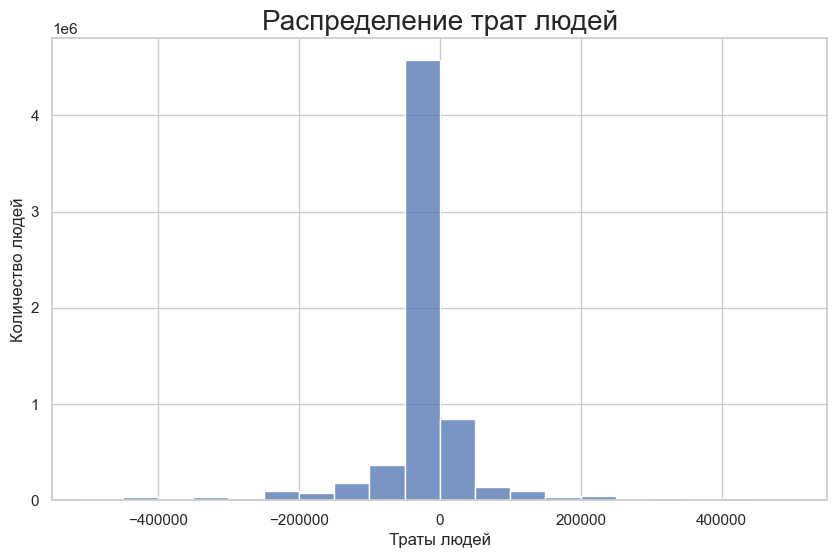

In [27]:
plt.figure(figsize = (10, 6))
plt.title('Распределение трат людей', fontsize = 20)
plt.ylabel('Количество людей')
plt.xlabel('Траты людей')
sns.histplot(
    df['amount'], 
    bins = 20,
    binrange = (-0.5*1e6, 0.5*1e6)
)
plt.show()

In [28]:
print(len(df.loc[df['amount'] > 175000]) / len(df) * 100)
print(len(df.loc[df['amount'] < -300000]) / len(df) * 100)

3.1391172237466174
3.3197914078220023


In [29]:
df = df.loc[(df['amount'] <= 175000) & (df['amount'] >= -300000)]

### ЗАПОЛНЕНИЕ ПРОПУСКОВ В СТОЛБЦЕ GENDER

In [30]:
features = data.loc[data.gender.notna(), ['mcc_code', 'amount']]
target = data.loc[data.gender.notna()]['gender']

features = features[:1800000]
target = target[:1800000]

In [31]:
len(list(features['mcc_code'].unique()))

184

In [32]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.4, random_state = 42
)

In [33]:
scaler = StandardScaler()
oh_encoder = OneHotEncoder(drop = 'first', sparse = False)

In [34]:
ct = ColumnTransformer(
    [
        ("standard_scaler", scaler, ['amount']),
        ("one_hot_encoder", oh_encoder, ['mcc_code'])
    ]
)

In [35]:
gb = GradientBoostingClassifier(random_state = 42)

In [36]:
pipeline_gb = Pipeline(
    [
        ("ct", ct),
        ("model", gb)
    ]
)

pipeline_gb.fit(features_train, target_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['amount']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['mcc_code'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [37]:
data_gender_nan = data.loc[data.gender.isna()]
gender_pred = pipeline_gb.predict(data_gender_nan[['mcc_code', 'amount']])
data_gender_nan.loc[:, 'gender'] = gender_pred

In [38]:
data = data.loc[data.gender.notna()]
data = pd.concat([data, data_gender_nan])

In [39]:
#сделаем тип значения столбца gender целочисленным
data['gender'] = data['gender'].astype('int')

In [40]:
#заполнение пропусков в столбце tr_description
#возможно потом заполню

In [41]:
data_amount_pos = data.loc[data['amount'] > 0]
data_amount_neg = data.loc[data['amount'] < 0]

In [42]:
data_amount_neg['amount'] = (
    data_amount_neg['amount']
    .apply({lambda x: -x})
    .apply({lambda x: np.ceil(x)})
    .astype('int')
)

/var/folders/15/mm6_3b9s0nb64nzlcf3sft6c0000gn/T/ipykernel_1087/4106778705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_amount_neg['amount'] = (


In [43]:
data_amount_neg['mcc_description'] = data_amount_neg['mcc_description'].apply(change_name_of_mcc)

/var/folders/15/mm6_3b9s0nb64nzlcf3sft6c0000gn/T/ipykernel_1087/1100757368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_amount_neg['mcc_description'] = data_amount_neg['mcc_description'].apply(change_name_of_mcc)


In [44]:
len(data_amount_neg.loc[data_amount_neg['tr_description'].isna()]) / len(data_amount_neg) * 100

0.049750363969837244

In [45]:
data_amount_neg = data_amount_neg.loc[data_amount_neg['tr_description'].notna()]

# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

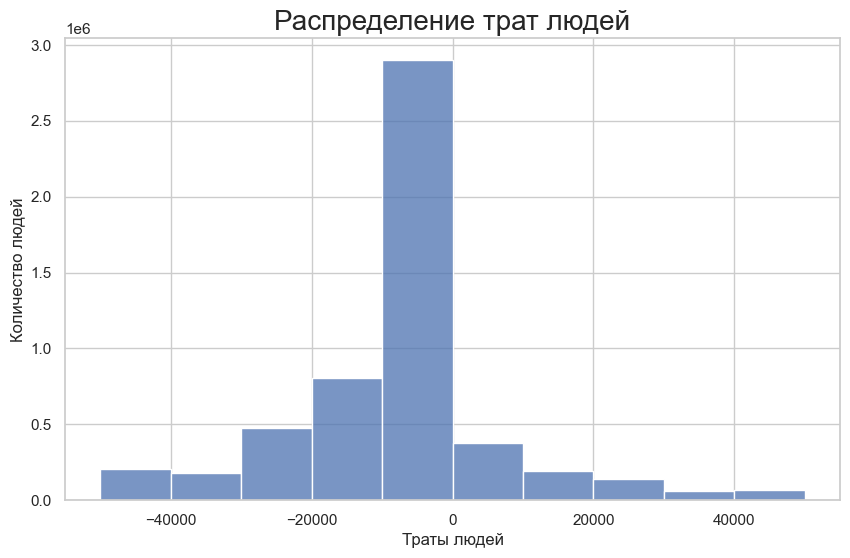

In [46]:
#смотрим самые частые суммы, которые тратят люди, и смотрим, на что люди тратят эти суммы
plt.figure(figsize = (10, 6))
plt.title('Распределение трат людей', fontsize = 20)
plt.ylabel('Количество людей')
plt.xlabel('Траты людей')
sns.histplot(
    data['amount'], 
    bins = 10,
    binrange = (-0.5*1e5, 0.5*1e5)
)
plt.show()

In [47]:
def plotHistAmountNeg(br_1, br_2):
    plt.figure(figsize = (10, 6))
    plt.title('Распределение трат людей', fontsize = 20)
    plt.ylabel('Количество людей')
    plt.xlabel('Траты людей')
    sns.histplot(
        data_amount_neg['amount'], 
        bins = 10,
        binrange = (br_1, br_2)
    )
    plt.show()

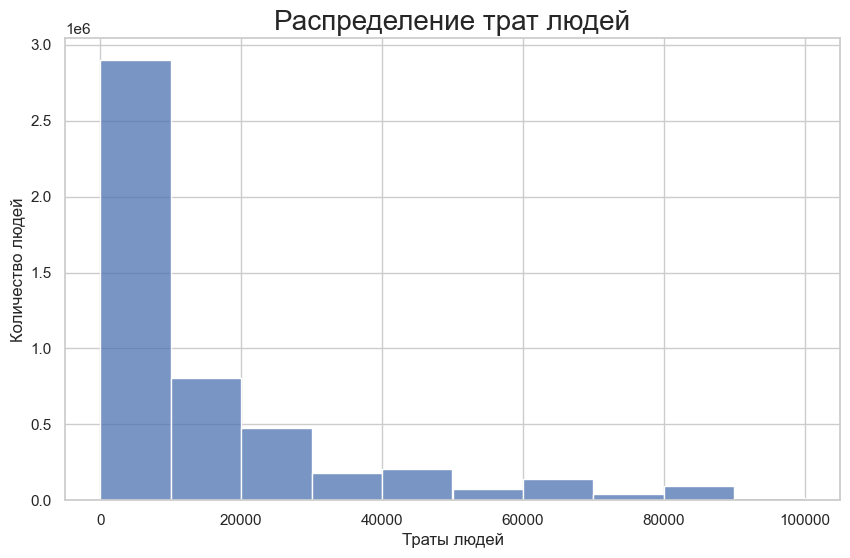

In [48]:
plotHistAmountNeg(0, 1*1e5)

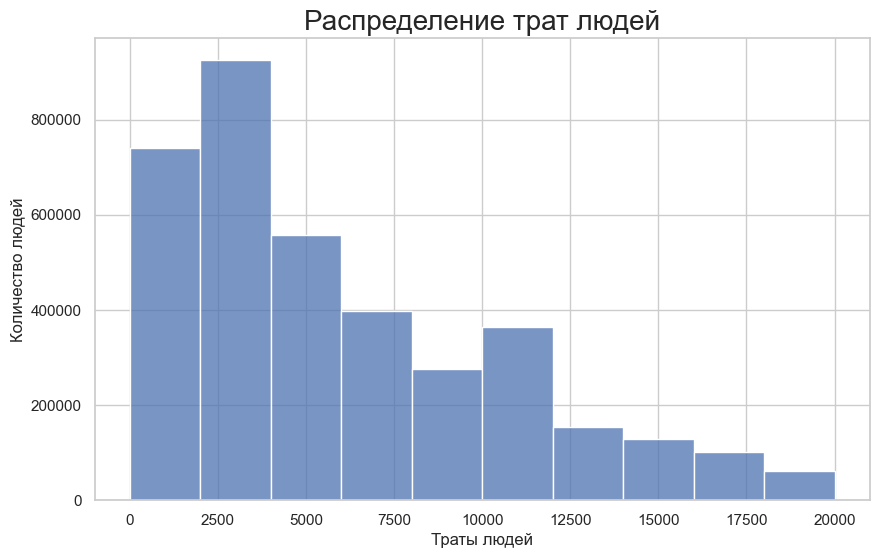

In [49]:
plotHistAmountNeg(0, 2*1e4)

In [50]:
def simplify_amount(amount):
    amount = int(amount)
    if amount < 1000:
        return round(amount, 2)
    else:
        amount /= 1000
        if amount < 1000:
            return str(round(amount, 2)) + ' тыс'
        else:
            amount /= 1000
            if amount < 1000:
                return str(round(amount, 2)) + ' млн'
            else:
                amount /= 1000
        if amount < 1000:
            return str(round(amount, 2)) + ' млрд'

In [51]:
def install_int_amount(dataset):
    dataset['amount'] = dataset['amount'].astype('int')

In [52]:
def configure_amount(dataset):
    install_int_amount(dataset)
    dataset['amount'] = dataset['amount'].apply(simplify_amount)

In [53]:
top_mcc_amount_neg = (
    data_amount_neg
    .loc[data_amount_neg['amount'] <= 20000]
    .groupby('mcc_description')
    .agg({'amount': 'sum', 'customer_id': 'count'})
    .reset_index()
    .sort_values(by = 'amount', ascending = False)
    .reset_index(drop = True)
)

install_int_amount(top_mcc_amount_neg)
# top_mcc_amount_neg = top_mcc_amount_neg.loc[
#                          (top_mcc_amount_neg['mcc_description'] != 'Снятие наличности') 
#                           &
#                          (top_mcc_amount_neg['mcc_description'] != 'Денежные переводы')]
top_mcc_amount_neg_1 = top_mcc_amount_neg.copy()
top_mcc_amount_neg_1['amount'] = top_mcc_amount_neg_1['amount'].apply(simplify_amount)
top_mcc_amount_neg_1

,mcc_description,amount,customer_id
0,"Бакалейные магазины, супермаркеты",5.51 млрд,803338
1,Телефонные звонки,3.25 млрд,951479
2,Снятие наличности,3.18 млрд,385250
3,Различные продовольственные магазины,1.75 млрд,317258
4,Денежные переводы,1.38 млрд,242429
...,...,...,...
177,Агенты и менеджеры по аренде недвижимости,167.68 тыс,15
178,"Организации, членства, нигде ранее не классифи...",159.07 тыс,21
179,Прямой маркетинг — комбинированный каталог и т...,132.06 тыс,12
180,Школы — бизнес и секретарей,87.58 тыс,7


In [54]:
top_mcc_amount_neg = top_mcc_amount_neg.loc[
                         (top_mcc_amount_neg['mcc_description'] != 'Снятие наличности') 
                          &
                         (top_mcc_amount_neg['mcc_description'] != 'Денежные переводы')
                          &
                         (top_mcc_amount_neg['mcc_description'] != 'Телефонные звонки')
                         ]
top_mcc_amount_neg = top_mcc_amount_neg.head(10).reset_index(drop = True)

In [55]:
top_mcc_amount_neg

,mcc_description,amount,customer_id
0,"Бакалейные магазины, супермаркеты",5513653811,803338
1,Различные продовольственные магазины,1749078790,317258
2,Аптеки,786848114,112923
3,Станции техобслуживания,745393141,77764
4,Универсальные магазины,662733760,110551
5,"Рестораны, закусочные",581510468,91505
6,"Места общественного питания, рестораны",535565342,86437
7,Магазины с продажей спиртных напитков,323436544,53905
8,Плавательные бассейны — распродажа,261966224,41464
9,Горючее топливо,188745624,20413


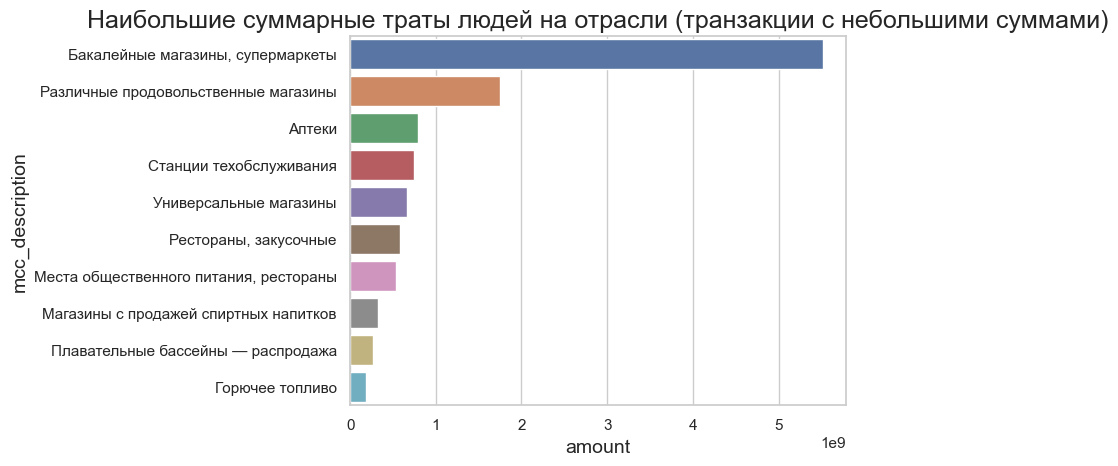

In [56]:
plt.title('Наибольшие суммарные траты людей на отрасли (транзакции с небольшими суммами)', 
          fontsize = 18)
plt.ylabel('', fontsize = 14)
plt.xlabel('', fontsize = 14)
sns.barplot(y = 'mcc_description',
            x = 'amount',
            data = top_mcc_amount_neg);

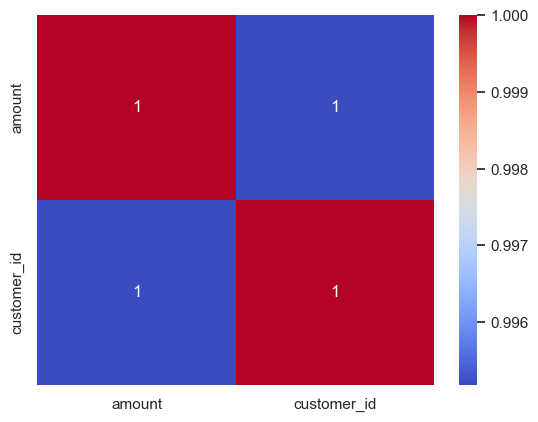

In [57]:
sns.heatmap(top_mcc_amount_neg[['amount', 'customer_id']].corr(), annot = True, cmap = 'coolwarm');

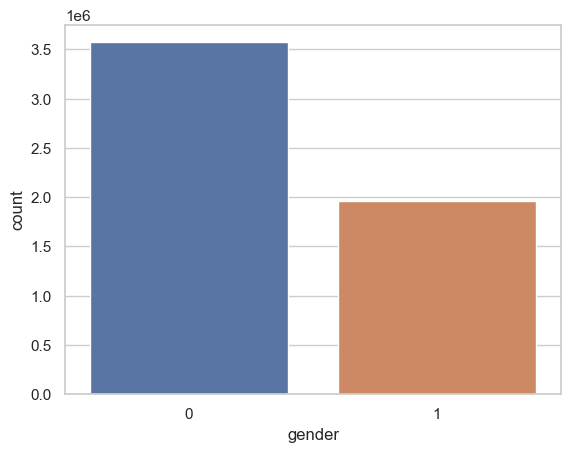

In [58]:
#barplot для пола
sns.countplot(x = 'gender', data = data_amount_neg);

In [59]:
#на что чаще всего тратят мужчины и женщины?

In [60]:
top_15_man_and_woman = (
    data_amount_neg
    .groupby(['mcc_description', 'gender'])
    .agg({'amount': 'sum', 'customer_id': 'count'})
    .reset_index()
    .head(15)
)

In [61]:
top_15_0 = (
    data_amount_neg
    .loc[data_amount_neg['gender'] == 0, ['mcc_description', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    )
top_15_0 = (
    top_15_0
    .loc[(top_15_0['mcc_description'] != 'Телефонные звонки')
            &
             (top_15_0['mcc_description'] != 'Снятие наличности')
            & 
             (top_15_0['mcc_description'] != 'Денежные переводы')]
    .reset_index(drop = True)
)
top_15_0 = top_15_0.head(15).reset_index(drop = True)
top_15_0

,mcc_description,customer_id
0,"Бакалейные магазины, супермаркеты",703231
1,Различные продовольственные магазины,246416
2,Аптеки,106041
3,Универсальные магазины,94157
4,"Рестораны, закусочные",45848
5,"Места общественного питания, рестораны",42298
6,Плавательные бассейны — распродажа,37356
7,Магазины косметики,30714
8,Универмаги,26514
9,Магазины мужской и женской одежды,23945


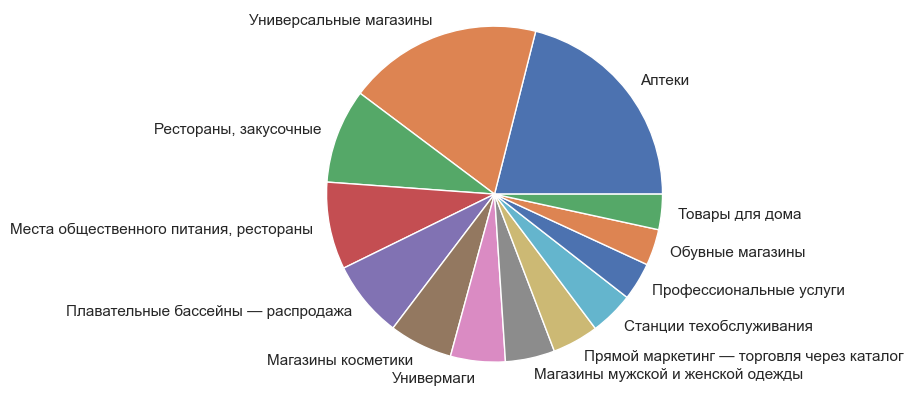

In [62]:
list_1 = list(top_15_0.loc[2:15, 'customer_id'])
# list_1.append(top_15_0.loc[13: , 'customer_id'].sum())
list_2 = list(top_15_0.loc[2:15, 'mcc_description'])
# list_2.append('Другое')
values = [value for value in list_1]
labels = [label for label in list_2]

fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis("equal");

In [63]:
top_15_1 = (
    data_amount_neg
    .loc[data_amount_neg['gender'] == 1, ['mcc_description', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    )

top_15_1 = (
    top_15_1
    .loc[(top_15_1['mcc_description'] != 'Телефонные звонки')
            &
             (top_15_1['mcc_description'] != 'Снятие наличности')
            & 
             (top_15_1['mcc_description'] != 'Денежные переводы')]
    .reset_index(drop = True)
)
top_15_1 = top_15_1.head(15).reset_index(drop = True)
top_15_1

,mcc_description,customer_id
0,"Бакалейные магазины, супермаркеты",257834
1,Станции техобслуживания,120019
2,Различные продовольственные магазины,89509
3,"Места общественного питания, рестораны",64507
4,"Рестораны, закусочные",50970
5,Магазины с продажей спиртных напитков,47144
6,Универсальные магазины,33571
7,Аптеки,27966
8,Горючее топливо,24199
9,Лесо- и строительный материал,23494


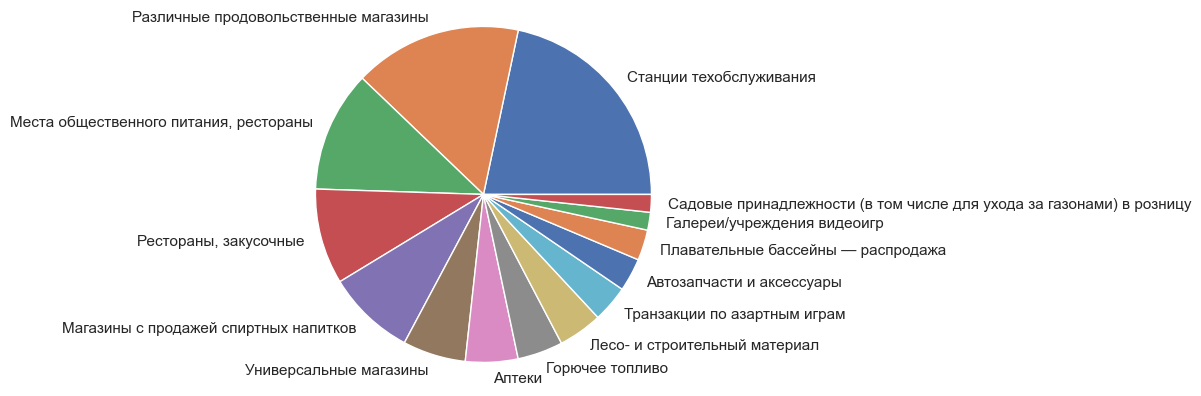

In [64]:
list_1 = list(top_15_1.loc[1:14, 'customer_id'])
# list_1.append(top_15_1.loc[5: , 'customer_id'].sum())
list_2 = list(top_15_1.loc[1:14, 'mcc_description'])
# list_2.append('Другое')
values = [value for value in list_1]
labels = [label for label in list_2]

fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis("equal");

In [65]:
#0 - жкнщины, 1 - мужчины 

In [66]:
#средние траты людей на различные отрасли, и сортировка по убыванию
mean_amount_count_people = (
    data_amount_neg
    .groupby(['mcc_description'])
    .agg({'amount': 'mean', 'customer_id': 'count'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(15)
)

mean_amount_count_people_1 = mean_amount_count_people.copy()
configure_amount(mean_amount_count_people_1)
mean_amount_count_people_1

,mcc_description,amount,customer_id
0,Снятие наличности,138.42 тыс,1191118
1,Телефонные звонки,4.8 тыс,987124
2,"Бакалейные магазины, супермаркеты",13.19 тыс,961065
3,Денежные переводы,184.25 тыс,624396
4,Различные продовольственные магазины,7.2 тыс,335925
5,Станции техобслуживания,21.91 тыс,141262
6,Аптеки,12.38 тыс,134007
7,Универсальные магазины,14.89 тыс,127728
8,"Места общественного питания, рестораны",16.78 тыс,106805
9,"Рестораны, закусочные",8.19 тыс,96818


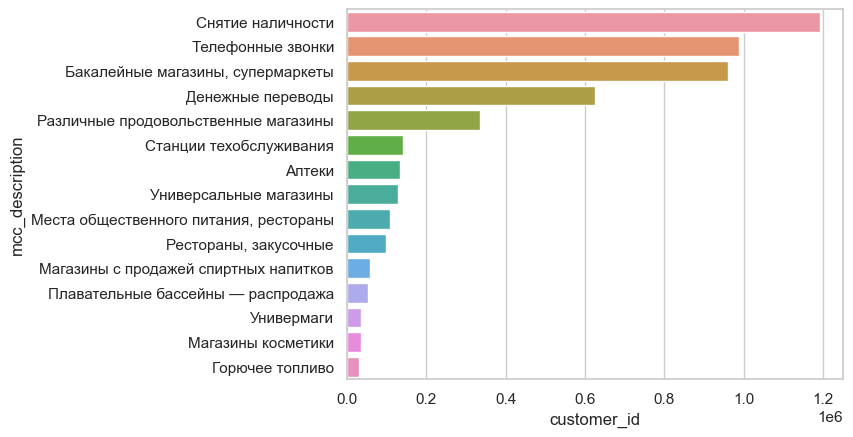

In [67]:
sns.barplot(x = 'customer_id', 
            y = 'mcc_description',
            data = mean_amount_count_people);

<Axes: xlabel='customer_id', ylabel='mcc_description'>

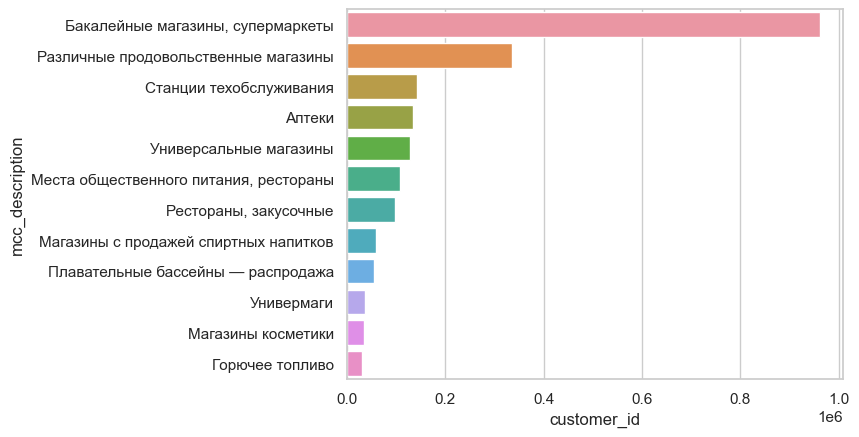

In [68]:
sns.barplot(x = 'customer_id', 
            y = 'mcc_description',
            data = mean_amount_count_people.loc[
                (mean_amount_count_people['mcc_description'] != 'Снятие наличности')
                &
                (mean_amount_count_people['mcc_description'] != 'Денежные переводы')
                &
                (mean_amount_count_people['mcc_description'] != 'Телефонные звонки')
            ])

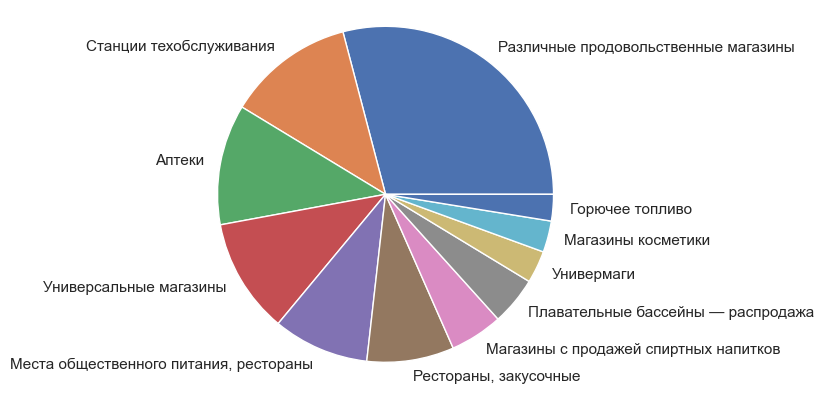

In [69]:
mean_amount_count_people = mean_amount_count_people.loc[
                (mean_amount_count_people['mcc_description'] != 'Снятие наличности')
                &
                (mean_amount_count_people['mcc_description'] != 'Денежные переводы')
                &
                (mean_amount_count_people['mcc_description'] != 'Телефонные звонки')
                &
                (mean_amount_count_people['mcc_description'] != 'Бакалейные магазины, супермаркеты')
            ]
values = [value for value in mean_amount_count_people['customer_id']]
labels = [label for label in mean_amount_count_people['mcc_description']]

fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis("equal");

In [70]:
#средние траты обоих полов на различные отрасли 
data_mean_amount_gender = (
    data_amount_neg
    .groupby(['mcc_description', 'gender'])
    .agg({'customer_id': 'count', 'amount': 'mean'})
    .reset_index()
)

In [71]:
#средние траты женщин
mean_amount_0 = (
    data_mean_amount_gender 
    .loc[data_mean_amount_gender['gender'] == 0, ['mcc_description', 'amount', 'customer_id']]
    .sort_values(by = 'amount', ascending = False)
    .reset_index(drop = True)
)
mean_amount_0 = mean_amount_0.loc[
                (mean_amount_0['mcc_description'] != 'Снятие наличности')
                &
                (mean_amount_0['mcc_description'] != 'Денежные переводы')
                &
                (mean_amount_0['mcc_description'] != 'Телефонные звонки')
                &
                (mean_amount_0['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                ]
mean_amount_0 = mean_amount_0.head(10).reset_index(drop = True)
mean_amount_0_new = mean_amount_0.copy()
configure_amount(mean_amount_0_new)
mean_amount_0_new

,mcc_description,amount,customer_id
0,Изготовление и продажа меховых изделий,258.86 тыс,342
1,"Авиалинии, авиакомпании",212.87 тыс,3028
2,Продажа мотоциклов,212.5 тыс,41
3,"Отели, мотели, базы отдыха, сервисы бронирования",208.01 тыс,754
4,Агентства по аренде автомобилей,195.83 тыс,6
5,Туристические агентства и организаторы экскурсий,165.52 тыс,1353
6,Прямой маркетинг — комбинированный каталог и т...,115.11 тыс,116
7,"Легковой и грузовой транспорт — продажа, серви...",109.19 тыс,438
8,Больницы,102.03 тыс,300
9,СТО общего назначения,94.66 тыс,248


In [72]:
#средние траты мужчин
mean_amount_1 = (
    data_mean_amount_gender 
    .loc[data_mean_amount_gender['gender'] == 1, ['mcc_description', 'amount', 'customer_id']]
    .sort_values(by = 'amount', ascending = False)
    .reset_index(drop = True)
)
mean_amount_1 = mean_amount_1.loc[
                (mean_amount_1['mcc_description'] != 'Снятие наличности')
                &
                (mean_amount_1['mcc_description'] != 'Денежные переводы')
                &
                (mean_amount_1['mcc_description'] != 'Телефонные звонки')
                &
                (mean_amount_1['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                ]
mean_amount_1 = mean_amount_1.head(10).reset_index(drop = True)
mean_amount_1_new = mean_amount_1.copy()
configure_amount(mean_amount_1_new)
mean_amount_1_new

,mcc_description,amount,customer_id
0,Веломагазины — продажа и обслуживание,2.04 млн,107
1,Прямой маркетинг — торговые точки подписки,1.66 млн,194
2,Агенты и менеджеры по аренде недвижимости,899.66 тыс,13
3,"Колледжи, университеты, профессиональные школы...",724.23 тыс,72
4,Изготовление и продажа меховых изделий,600.2 тыс,317
5,"Организации, членства, нигде ранее не классифи...",483.28 тыс,39
6,Туристические агентства и организаторы экскурсий,447.44 тыс,1128
7,Агентства по аренде автомобилей,405.21 тыс,47
8,Организации благотворительные и общественные с...,395.87 тыс,103
9,"Офисное, фотографическое, фотокопировальное, и...",328.85 тыс,38


In [73]:
#зависимость трат от времени года
data_season_amount = (
    data_amount_neg
    .groupby('season')
    .agg({'amount': ['sum', 'mean', 'min', 'max']})
    .reset_index()
)
data_season_amount

season        amount                             
                   sum          mean min        max
0  Весна   98375341014  65789.481754   1  134754947
1   Зима  112434908914  62261.488448   1  112274038
2   Лето   66048703888  62931.876825   1  145984526
3  Осень   69712352145  58669.121983   1   67377474

In [74]:
#выборка строк по заданному сезону, группировка по отраслям, суммирование трат и количества людей,
#осуществивших транзакции
data_sum_count_winter = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Зима', ['mcc_description', 'amount', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(15)
)
data_sum_count_winter_1 = data_sum_count_winter.copy()
configure_amount(data_sum_count_winter_1)
data_sum_count_winter_1

,mcc_description,customer_id,amount
0,Снятие наличности,389759,53.95 млрд
1,Телефонные звонки,322652,1.54 млрд
2,"Бакалейные магазины, супермаркеты",306654,3.9 млрд
3,Денежные переводы,198147,36.78 млрд
4,Различные продовольственные магазины,111852,783.53 млн
5,Станции техобслуживания,49240,1.08 млрд
6,Универсальные магазины,42251,645.52 млн
7,Аптеки,41528,495.2 млн
8,"Места общественного питания, рестораны",36098,612.55 млн
9,"Рестораны, закусочные",31688,263.87 млн


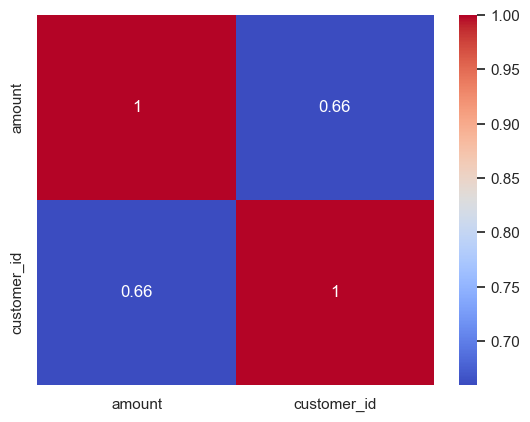

In [75]:
sns.heatmap(data_sum_count_winter[['amount', 'customer_id']].corr(), annot = True, cmap = 'coolwarm');

In [76]:
def draw_circle_diagramm(data_sum_count_season, attribute):
    dataset = data_sum_count_season.copy()
    dataset = dataset.loc[
                (dataset['mcc_description'] != 'Снятие наличности')
                &
                (dataset['mcc_description'] != 'Денежные переводы')
                &
                (dataset['mcc_description'] != 'Телефонные звонки')
                &
                (dataset['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (dataset['mcc_description'] != 'Различные продовольственные магазины')
    ]
    values = [value for value in dataset[attribute]]
    labels = [label for label in dataset['mcc_description']]

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels)
    ax.axis("equal");

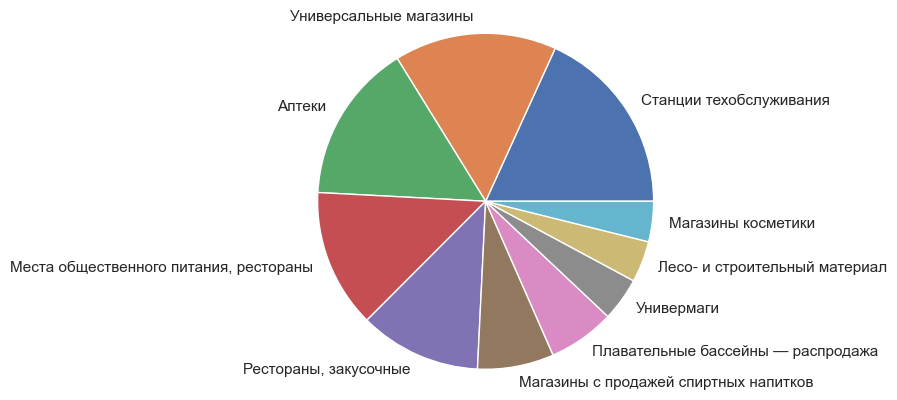

In [77]:
draw_circle_diagramm(data_sum_count_winter, 'customer_id')

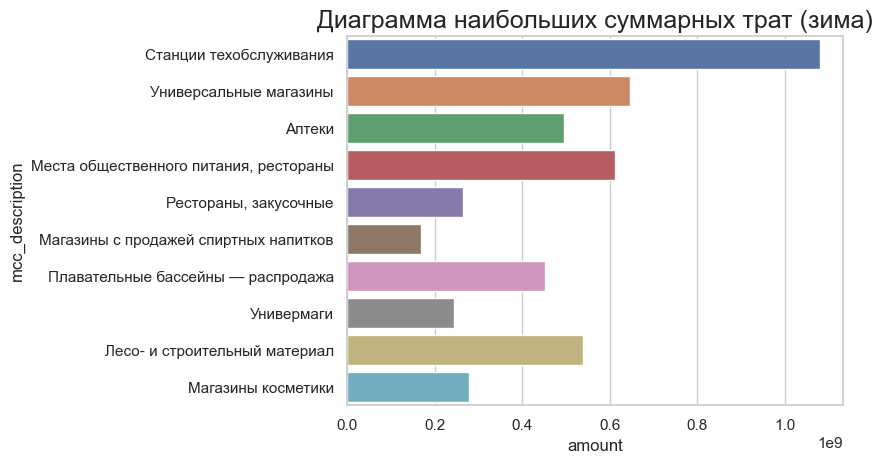

In [78]:
sns.barplot(x = 'amount',
            y = 'mcc_description',
            data = data_sum_count_winter.loc[
                (data_sum_count_winter['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_winter['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_winter['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_winter['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_winter['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма наибольших суммарных трат (зима)', fontsize = 18);

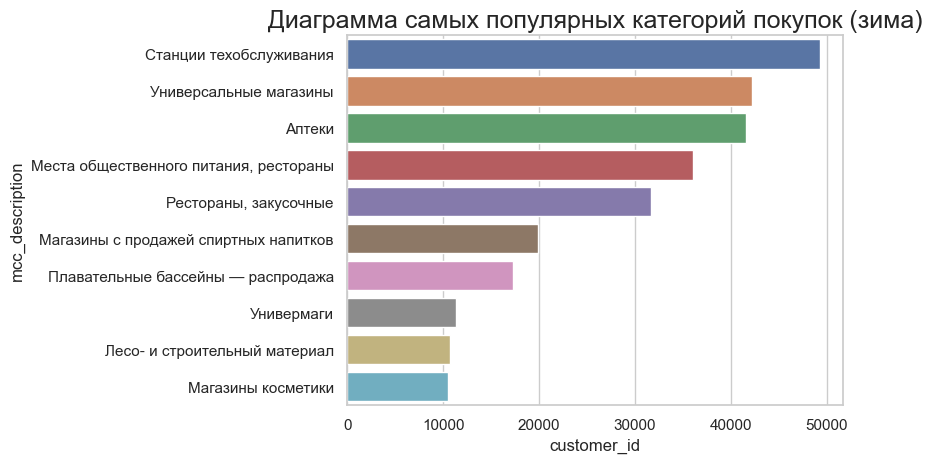

In [79]:
sns.barplot(x = 'customer_id',
            y = 'mcc_description',
            data = data_sum_count_winter.loc[
                (data_sum_count_winter['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_winter['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_winter['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_winter['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_winter['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма самых популярных категорий покупок (зима)', fontsize = 18);

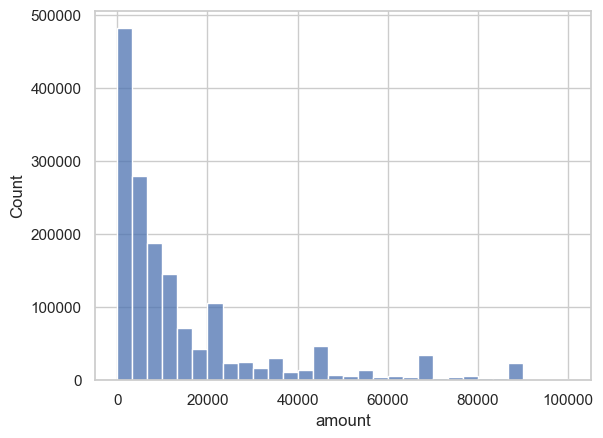

In [80]:
sns.histplot(data_amount_neg.loc[data_amount_neg['season'] == 'Зима']['amount'],
             bins = 30,
             binrange = (0, 0.1*1e6));

In [81]:
data_sum_count_spring = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Весна', ['mcc_description', 'amount', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(15)
)
data_sum_count_spring_1 = data_sum_count_spring.copy()
configure_amount(data_sum_count_spring_1)
data_sum_count_spring_1

,mcc_description,customer_id,amount
0,Снятие наличности,331965,47.97 млрд
1,Телефонные звонки,267976,1.3 млрд
2,"Бакалейные магазины, супермаркеты",250804,3.4 млрд
3,Денежные переводы,173756,31.7 млрд
4,Различные продовольственные магазины,84724,617.49 млн
5,Аптеки,36634,461.9 млн
6,Станции техобслуживания,36554,834.55 млн
7,Универсальные магазины,31628,469.55 млн
8,"Места общественного питания, рестораны",28264,463.62 млн
9,"Рестораны, закусочные",25676,205.09 млн


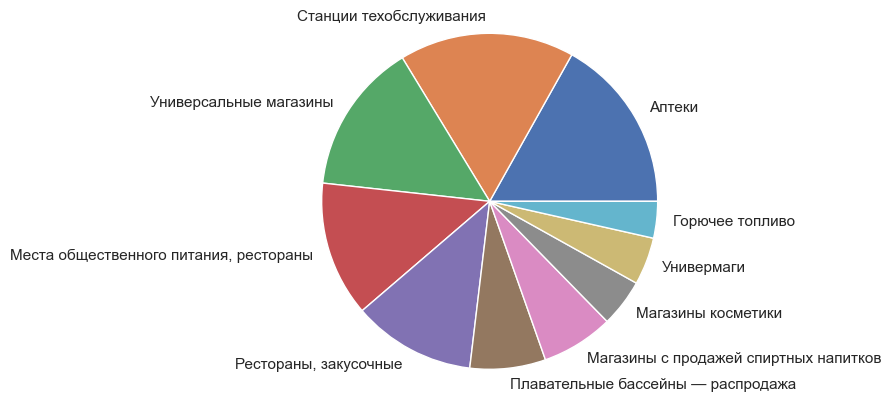

In [82]:
draw_circle_diagramm(data_sum_count_spring, 'customer_id')

Text(0.5, 1.0, 'Диаграмма наибольших суммарных трат (весна)')

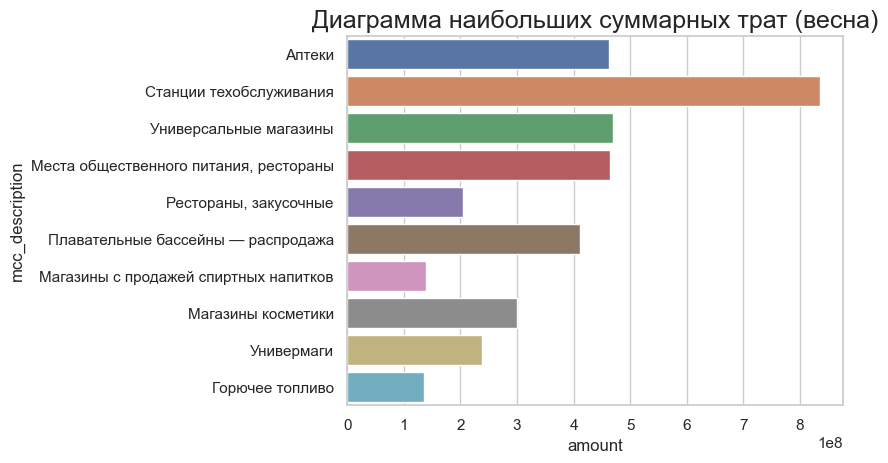

In [83]:
sns.barplot(x = 'amount',
            y = 'mcc_description',
            data = data_sum_count_spring.loc[
                (data_sum_count_spring['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_spring['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_spring['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_spring['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_spring['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма наибольших суммарных трат (весна)', fontsize = 18)

Text(0.5, 1.0, 'Диаграмма самых популярных категорий покупок (весна)')

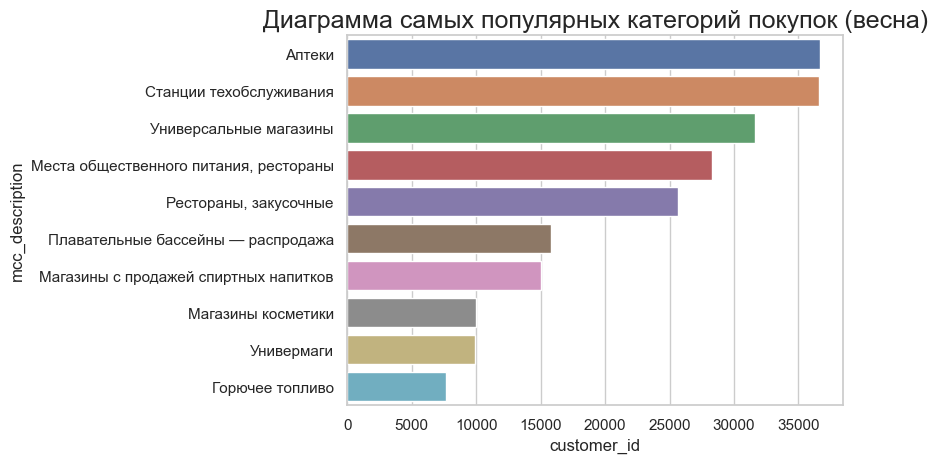

In [84]:
sns.barplot(x = 'customer_id',
            y = 'mcc_description',
            data = data_sum_count_spring.loc[
                (data_sum_count_spring['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_spring['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_spring['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_spring['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_spring['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма самых популярных категорий покупок (весна)', fontsize = 18)

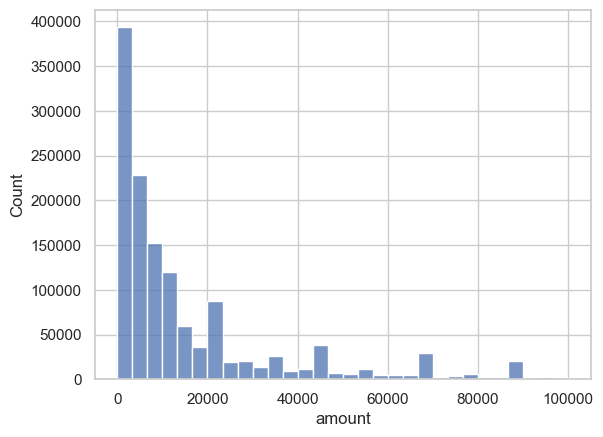

In [85]:
sns.histplot(data_amount_neg.loc[data_amount_neg['season'] == 'Весна']['amount'],
             bins = 30,
             binrange = (0, 0.1*1e6));

In [86]:
data_sum_count_summer = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Лето', ['mcc_description', 'amount', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(15)
)
data_sum_count_summer_1 = data_sum_count_summer.copy()
configure_amount(data_sum_count_summer_1)
data_sum_count_summer_1

,mcc_description,customer_id,amount
0,Снятие наличности,223420,30.18 млрд
1,Телефонные звонки,193768,927.19 млн
2,"Бакалейные магазины, супермаркеты",185921,2.57 млрд
3,Денежные переводы,115366,23.3 млрд
4,Различные продовольственные магазины,62704,471.8 млн
5,Аптеки,27930,356.28 млн
6,Станции техобслуживания,25447,556.1 млн
7,Универсальные магазины,24217,383.56 млн
8,"Места общественного питания, рестораны",19170,330.16 млн
9,"Рестораны, закусочные",17521,146.15 млн


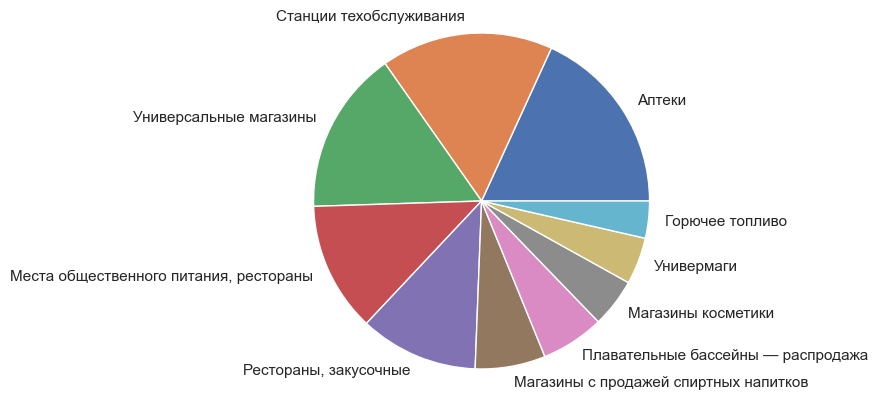

In [87]:
draw_circle_diagramm(data_sum_count_summer, 'customer_id')

Text(0.5, 1.0, 'Диаграмма наибольших суммарных трат (лето)')

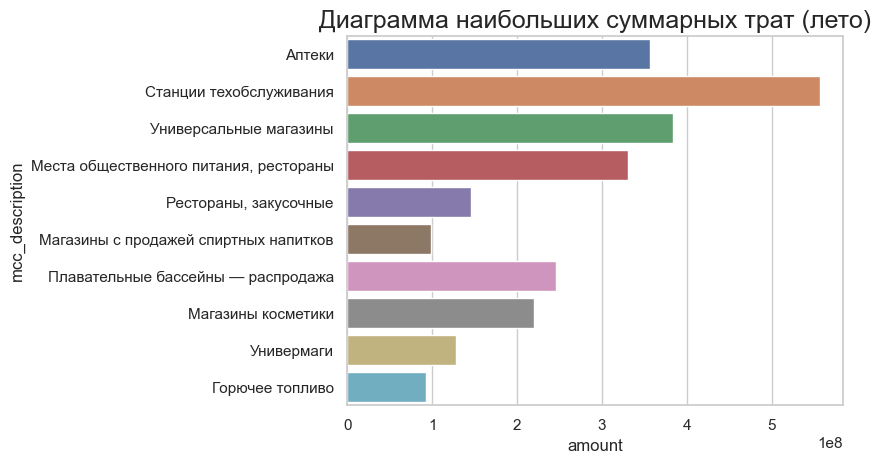

In [88]:
sns.barplot(x = 'amount',
            y = 'mcc_description',
            data = data_sum_count_summer.loc[
                (data_sum_count_summer['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_summer['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_summer['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_summer['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_summer['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма наибольших суммарных трат (лето)', fontsize = 18)

Text(0.5, 1.0, 'Диаграмма самых популярных категорий покупок (лето)')

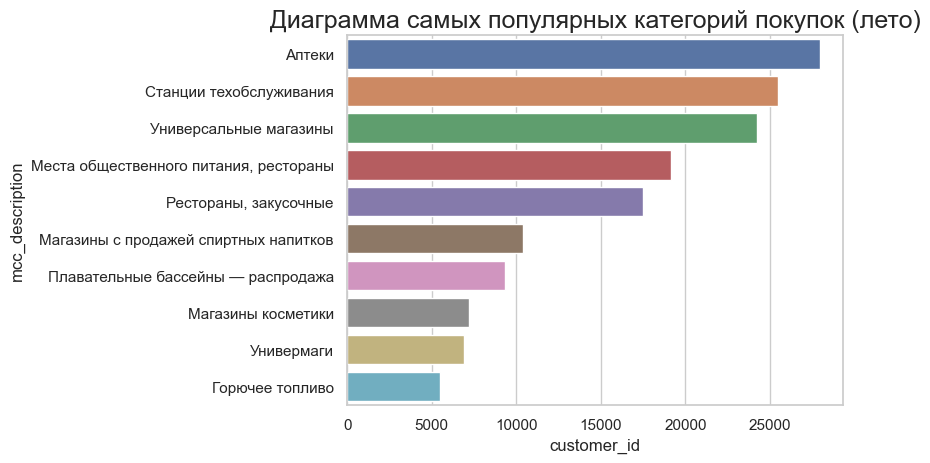

In [89]:
sns.barplot(x = 'customer_id',
            y = 'mcc_description',
            data = data_sum_count_summer.loc[
                (data_sum_count_summer['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_summer['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_summer['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_summer['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_summer['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма самых популярных категорий покупок (лето)', fontsize = 18)

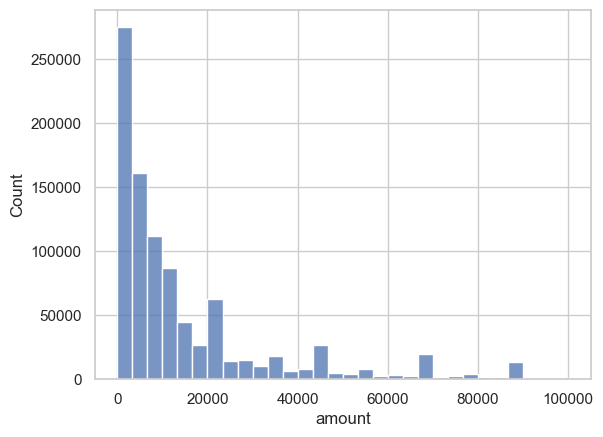

In [90]:
sns.histplot(data_amount_neg.loc[data_amount_neg['season'] == 'Лето']['amount'],
             bins = 30,
             binrange = (0, 0.1*1e6));

In [91]:
data_sum_count_autumn = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Осень', ['mcc_description', 'amount', 'customer_id']]
    .groupby('mcc_description')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(15)
)
data_sum_count_autumn_1 = data_sum_count_autumn.copy()
configure_amount(data_sum_count_autumn_1)
data_sum_count_autumn_1

,mcc_description,customer_id,amount
0,Снятие наличности,245974,32.78 млрд
1,"Бакалейные магазины, супермаркеты",217686,2.82 млрд
2,Телефонные звонки,202728,964.19 млн
3,Денежные переводы,137127,23.27 млрд
4,Различные продовольственные магазины,76645,545.6 млн
5,Станции техобслуживания,30021,625.64 млн
6,Универсальные магазины,29632,403.07 млн
7,Аптеки,27915,345.75 млн
8,"Места общественного питания, рестораны",23273,386.01 млн
9,"Рестораны, закусочные",21933,178.18 млн


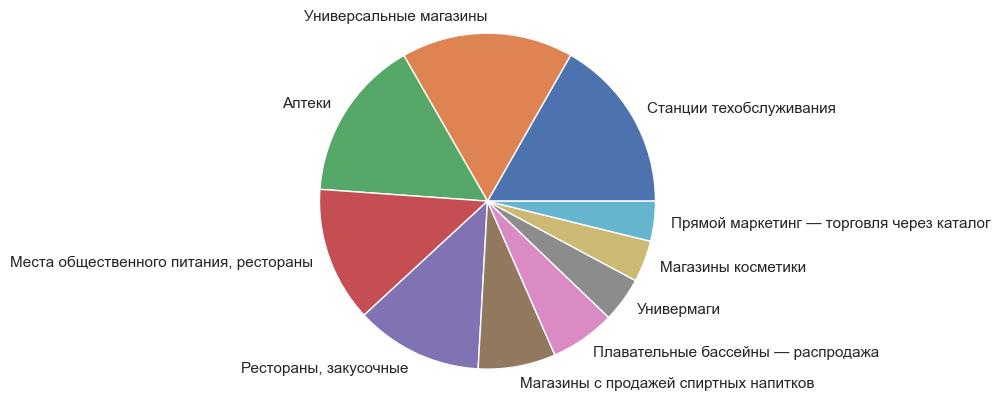

In [92]:
draw_circle_diagramm(data_sum_count_autumn, 'customer_id')

Text(0.5, 1.0, 'Диаграмма наибольших суммарных трат (осень)')

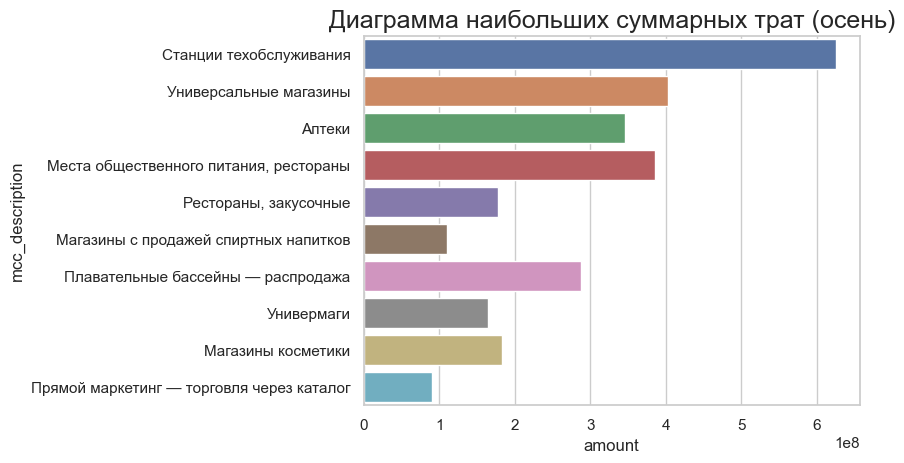

In [93]:
sns.barplot(x = 'amount',
            y = 'mcc_description',
            data = data_sum_count_autumn.loc[
                (data_sum_count_autumn['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_autumn['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_autumn['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_autumn['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_autumn['mcc_description'] != 'Различные продовольственные магазины')
            ])
plt.title('Диаграмма наибольших суммарных трат (осень)', fontsize = 18)

Text(0.5, 1.0, 'Диаграмма самых популярных категорий покупок (осень)')

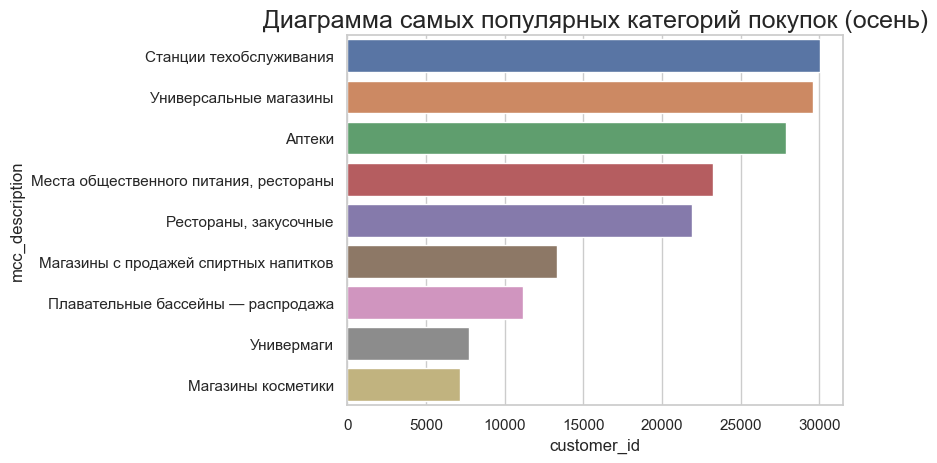

In [94]:
sns.barplot(x = 'customer_id',
            y = 'mcc_description',
            data = data_sum_count_autumn.loc[
                (data_sum_count_autumn['mcc_description'] != 'Снятие наличности')
                &
                (data_sum_count_autumn['mcc_description'] != 'Денежные переводы')
                &
                (data_sum_count_autumn['mcc_description'] != 'Телефонные звонки')
                &
                (data_sum_count_autumn['mcc_description'] != 'Бакалейные магазины, супермаркеты')
                &
                (data_sum_count_autumn['mcc_description'] != 'Различные продовольственные магазины')
                &
                (data_sum_count_autumn['mcc_description'] != 'Прямой маркетинг — торговля через каталог')

            ])
plt.title('Диаграмма самых популярных категорий покупок (осень)', fontsize = 18)

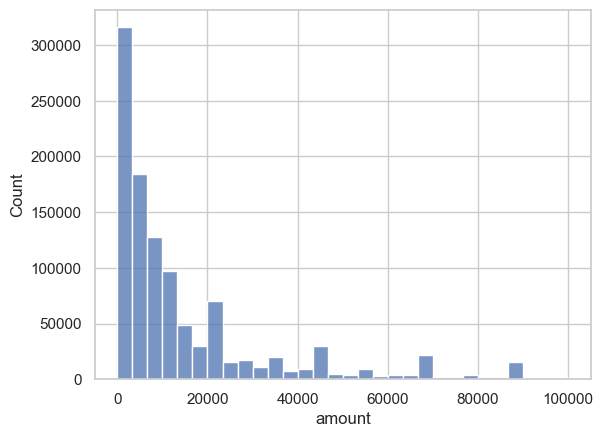

In [95]:
sns.histplot(data_amount_neg.loc[data_amount_neg['season'] == 'Осень']['amount'],
             bins = 30,
             binrange = (0, 0.1*1e6));

In [96]:
#активность клиентов банка в разные времена года
(
    data_amount_neg
    .groupby('season')
    .agg({'customer_id': 'count'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
)

,season,customer_id
0,Зима,1805850
1,Весна,1495305
2,Осень,1188229
3,Лето,1049527


In [97]:
data_times_of_day_customers_count_winter = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Зима', ['times_of_day', 'amount', 'customer_id']]
    .groupby('times_of_day')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
)

data_times_of_day_customers_count_winter

,times_of_day,customer_id,amount
0,День,663744,45253604326
1,Утро,484328,35256990324
2,Вечер,341007,20137828389
3,Ночь,316771,11786485875


In [98]:
#зимой люди тратят чаще всего; построим гистограмму распределения трат по времени суток

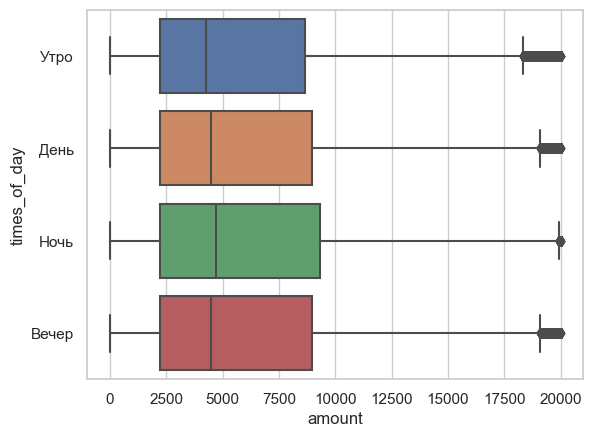

In [99]:
sns.boxplot(data = data_amount_neg.loc[(data_amount_neg['season'] == 'Зима')
                                     & (data_amount_neg['amount'] <= 0.2*1e5)],
            x = 'amount',
            y = 'times_of_day');

Text(0.5, 1.0, 'Распределение трат зимой (день)')

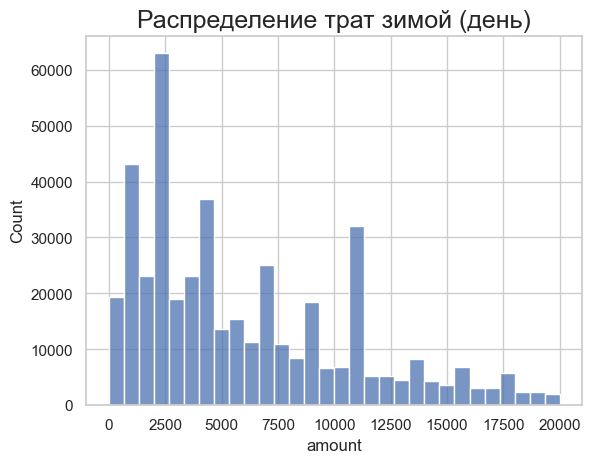

In [100]:
sns.histplot(data_amount_neg.loc[(data_amount_neg['season'] == 'Зима') 
                               & (data_amount_neg['times_of_day'] == 'День')]['amount'],
             bins = 30,
             binrange = (0, 0.2*1e5));
plt.title('Распределение трат зимой (день)', fontsize = 18)

Text(0.5, 1.0, 'Распределение трат зимой (утро)')

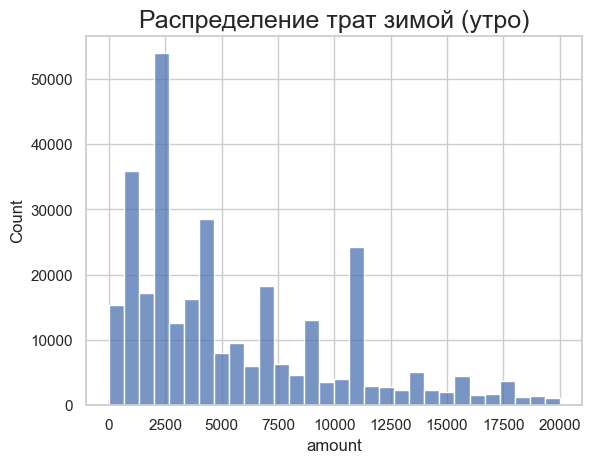

In [101]:
sns.histplot(data_amount_neg.loc[(data_amount_neg['season'] == 'Зима') 
                               & (data_amount_neg['times_of_day'] == 'Утро')]['amount'],
             bins = 30,
             binrange = (0, 0.2*1e5));
plt.title('Распределение трат зимой (утро)', fontsize = 18)

Text(0.5, 1.0, 'Распределение трат зимой (вечер)')

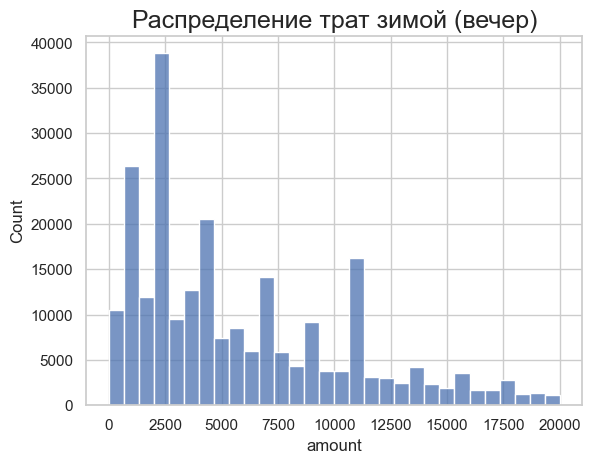

In [102]:
sns.histplot(data_amount_neg.loc[(data_amount_neg['season'] == 'Зима') 
                               & (data_amount_neg['times_of_day'] == 'Вечер')]['amount'],
             bins = 30,
             binrange = (0, 0.2*1e5));
plt.title('Распределение трат зимой (вечер)', fontsize = 18)

Text(0.5, 1.0, 'Распределение трат зимой (ночь)')

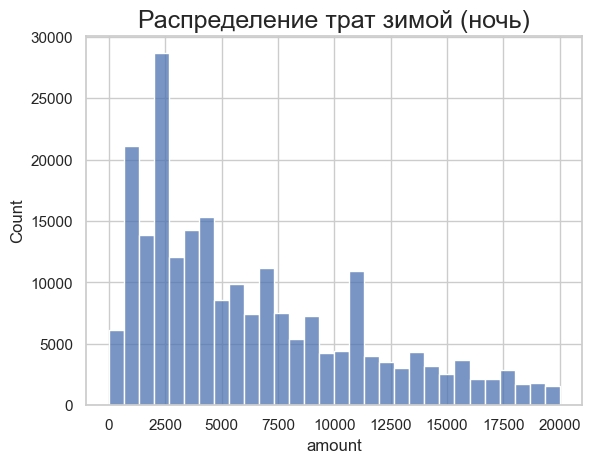

In [103]:
sns.histplot(data_amount_neg.loc[(data_amount_neg['season'] == 'Зима') 
                               & (data_amount_neg['times_of_day'] == 'Ночь')]['amount'],
             bins = 30,
             binrange = (0, 0.2*1e5));
plt.title('Распределение трат зимой (ночь)', fontsize = 18)

In [104]:
data_times_of_day_customers_count_spring = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Весна', ['times_of_day', 'amount', 'customer_id']]
    .groupby('times_of_day')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(10)
)

data_times_of_day_customers_count_spring

,times_of_day,customer_id,amount
0,День,568393,40166582689
1,Утро,397290,30957097710
2,Вечер,269100,16938414937
3,Ночь,260522,10313245678


In [105]:
data_times_of_day_customers_count_summer = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Лето', ['times_of_day', 'amount', 'customer_id']]
    .groupby('times_of_day')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(10)
)

data_times_of_day_customers_count_summer

,times_of_day,customer_id,amount
0,День,403013,25997982287
1,Утро,275778,23514465249
2,Вечер,188541,9936769223
3,Ночь,182195,6599487129


In [106]:
data_times_of_day_customers_count_autumn = (
    data_amount_neg
    .loc[data_amount_neg['season'] == 'Осень', ['times_of_day', 'amount', 'customer_id']]
    .groupby('times_of_day')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(10)
)

data_times_of_day_customers_count_autumn

,times_of_day,customer_id,amount
0,День,432547,27943246615
1,Утро,323139,21919129451
2,Вечер,225216,12594220036
3,Ночь,207327,7255756043


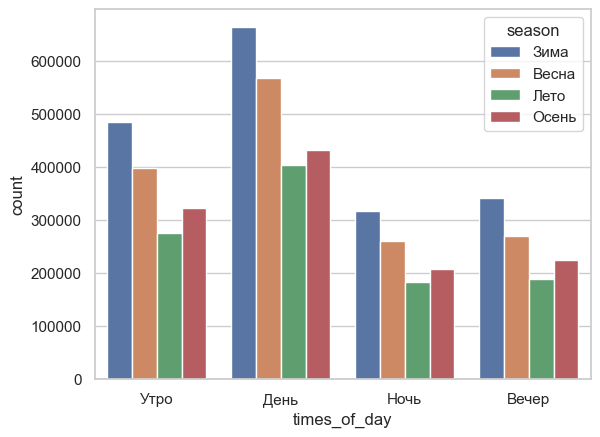

In [107]:
sns.countplot(x = 'times_of_day',
              hue = 'season',
              data = (
                  data_amount_neg[['times_of_day', 'amount', 'customer_id', 'season']]
              )
             );

In [108]:
#активность в разрезе времён суток 
(
    data_amount_neg
    .groupby('times_of_day')
    .agg({'customer_id': 'count', 'amount': 'sum'})
    .sort_values(by = 'customer_id', ascending = False)
    .reset_index()
    .head(10)
)

,times_of_day,customer_id,amount
0,День,2067697,139361415917
1,Утро,1480535,111647682734
2,Вечер,1023864,59607232585
3,Ночь,966815,35954974725


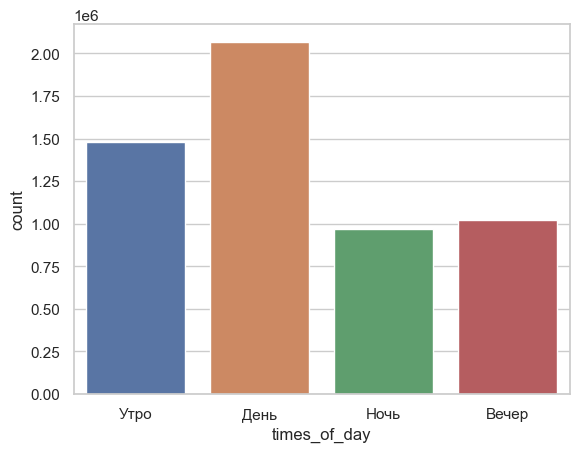

In [109]:
sns.countplot(x = 'times_of_day',
              data = (
                  data_amount_neg[['times_of_day', 'amount', 'customer_id', 'season']]
              )
             );

## ПРОГНОЗИРОВАНИЕ СУММЫ ТРАНЗАКЦИЙ

In [110]:
data

,customer_id,mcc_code,tr_type,amount,gender,mcc_description,tr_description,day,time,month,season,times_of_day
0,39026145,4814,1030,-2245.92,1,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26,Январь 2020,Зима,Утро
1,39026145,6011,7010,56147.89,1,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1,10:19:29,Январь 2020,Зима,Утро
2,39026145,4829,2330,-56147.89,1,Денежные переводы,Списание с карты по операции “перевода с карты...,1,10:20:56,Январь 2020,Зима,Утро
3,39026145,5499,1010,-1392.47,1,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1,10:39:54,Январь 2020,Зима,Утро
4,39026145,5499,1010,-920.83,1,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2,15:33:42,Январь 2020,Зима,День
...,...,...,...,...,...,...,...,...,...,...,...,...
6848702,8860625,6011,2010,-44918.32,0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России,446,09:35:07,Март 2021,Весна,Утро
6848703,8860625,5331,1010,-8871.37,0,Универсальные магазины,Покупка. POS ТУ СБ РФ,449,10:28:49,Март 2021,Весна,Утро
6848704,8860625,4814,1030,-4491.83,0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,449,21:12:44,Март 2021,Весна,Вечер
6848705,8860625,6011,2010,-67377.47,0,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России,452,10:15:01,Март 2021,Весна,Утро


In [111]:
features = data.loc[:200000, ['mcc_code', 'tr_type', 'gender', 'season', 'day']]
target = data.loc[:200000, ['amount']]

In [112]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.4, random_state = 42
)

In [113]:
standard_scaler = StandardScaler()
oh_encoder = OneHotEncoder(drop = 'first', sparse = False)
robust_scaler = RobustScaler()

NameError: name 'RobustScaler' is not defined

In [ ]:
ct = ColumnTransformer(
    [
        ("standard_scaler", scaler, ['day']),
        ("one_hot_encoder", oh_encoder, ['mcc_code', 'tr_type', 'season'])
    ],
    remainder = 'passthrough'
)

In [ ]:
gb = GradientBoostingRegressor(random_state = 42)

In [ ]:
pipeline_gb = Pipeline(
    [
        ("ct", ct),
        ("model", gb)
    ]
)

# pipeline_gb.fit(features_train, target_train)

## КЛАСТЕРИЗАЦИЯ

In [ ]:
data

In [ ]:
data_analysis = (data
                 .drop(['customer_id', 'tr_type', 'mcc_description', 
                           'tr_description', 'time', 'month', 'day'], axis = 1)
                 .loc[data['amount'] < 0]
                )
data_analysis['amount'] = data_analysis['amount'].apply(lambda x: -x)
data_analysis = data_analysis.loc[:500000]

In [ ]:
data_analysis_scaled = scaler.fit_transform(data_analysis.drop(['mcc_code', 'gender', 'season', 'times_of_day'], axis = 1))
data_analysis_encoded = oh_encoder.fit_transform(data_analysis.drop(['amount', 'gender'], axis = 1))

In [ ]:
data_analysis_encoded

In [ ]:
data_analysis_new = pd.DataFrame(data_analysis_encoded)
data_analysis_new

In [ ]:
ct = ColumnTransformer(
    [
        ("standard_scaler", scaler, ['amount']),
        ("one_hot_encoder", oh_encoder, ['mcc_code', 'season', 'times_of_day'])
    ],
    remainder = 'passthrough'
)

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 6):
    
    kmeans = KMeans(n_clusters = i)
    clusters.append(km.inertia_)
    
#     pipeline_kmeans = Pipeline(
#         [
#             ("ct", ct),
#             ("clustering", kmeans)
#         ]
#     )
    
#     pipeline_kmeans.fit(data_analysis)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 6)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data.loc[['']])
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

## ВРЕМЕННЫЕ РЯДЫ

In [114]:
data_analysis_ts = data.drop(['customer_id'], axis = 1)
data_analysis_ts = data_analysis_ts.loc[data_analysis_ts['amount'] < 0].reset_index(drop = True)
data_analysis_ts = data_analysis_ts.loc[data_analysis_ts['day'] <= 364].reset_index(drop = True)
data_analysis_ts['amount'] = data_analysis_ts['amount'].apply(lambda x: -x)
data_analysis_ts['amount'] = data_analysis_ts['amount'].astype('int')

In [115]:
dict_month_name_number = {
    'Январь': '01',
    'Февраль': '02',
    'Март': '03',
    'Апрель': '04',
    'Май': '05',
    'Июнь': '06',
    'Июль': '07',
    'Август': '08',
    'Сентябрь': '09',
    'Октябрь': '10',
    'Ноябрь': '11',
    'Декабрь': '12'
}

temp_list = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
dict_day_by_number = {}
for i in range(1, 29):
    if i <= 9:
        dict_day_by_number["0" + str(i)] = [j + i - 1 for j in temp_list]
    else:
        dict_day_by_number[str(i)] = [j + i - 1 for j in temp_list]

temp_list_for_29 = [28, 87, 118, 148, 179, 209, 240, 271, 301, 332, 362]
temp_list_for_30 = [29, 88, 119, 149, 180, 210, 241, 272, 302, 333, 363]
temp_list_for_31 = [30, 89, 150, 211, 242, 303, 364]

dict_day_by_number["29"] = temp_list_for_29
dict_day_by_number["30"] = temp_list_for_30
dict_day_by_number["31"] = temp_list_for_31

In [116]:
def to_correct_day(day):
    day = int(day)
    for key in dict_day_by_number.keys():
        if day in dict_day_by_number[key]:
            day = key
    return day

def month_to_number(month):
    month = dict_month_name_number[month.split()[0]]
    return month

In [117]:
data_analysis_ts['day_correct'] = data_analysis_ts['day'].apply(to_correct_day)
data_analysis_ts['month'] = data_analysis_ts['month'].apply(month_to_number)

In [118]:
def to_date_string(row):
    return row['day_correct'] + '-' + row['month'] + '-2020' + ' ' + row['time']

def to_date_string_without_time(row):
    return row['day_correct'] + '-' + row['month'] + '-2020'

data_analysis_ts['date'] = data_analysis_ts.apply(to_date_string, axis = 1)
data_analysis_ts['date_without_time'] = data_analysis_ts.apply(to_date_string_without_time, axis = 1)

In [119]:
data_analysis_ts = data_analysis_ts.drop(['month', 'time'], axis = 1)

In [120]:
from datetime import datetime, date

data_analysis_ts['date'] = pd.to_datetime(data_analysis_ts['date'], format = "%d-%m-%Y %H:%M:%S")
data_analysis_ts['date_without_time'] = pd.to_datetime(data_analysis_ts['date_without_time'], format = "%d-%m-%Y")
data_analysis_ts.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,mcc_code,tr_type,amount,gender,mcc_description,tr_description,day,season,times_of_day,day_correct,date,date_without_time
0,4814,1030,2245,1,"Звонки с использованием телефонов, считывающих магнитную ленту",Оплата услуги. Банкоматы СБ РФ,0,Зима,Утро,01,2020-01-01 10:23:26,2020-01-01 00:00:00
1,4829,2330,56147,1,Денежные переводы,Списание с карты по операции “перевода с карты на карту” через АТМ (в пределах одного тер.банка),1,Зима,Утро,02,2020-01-02 10:20:56,2020-01-02 00:00:00
2,5499,1010,1392,1,"Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов",Покупка. POS ТУ СБ РФ,1,Зима,Утро,02,2020-01-02 10:39:54,2020-01-02 00:00:00
3,5499,1010,920,1,"Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов",Покупка. POS ТУ СБ РФ,2,Зима,День,03,2020-01-03 15:33:42,2020-01-03 00:00:00
4,5541,1010,14643,1,Станции техобслуживания,Покупка. POS ТУ СБ РФ,2,Зима,День,03,2020-01-03 15:53:49,2020-01-03 00:00:00


In [121]:
data_analysis_ts = data_analysis_ts.drop_duplicates(subset = 'date')
data_analysis_ts.index = data_analysis_ts['date']

In [122]:
amount_describe = (
    data_analysis_ts
        .groupby('date_without_time')
        .agg({'amount': ['mean', 'max', 'min']})
        .reset_index(drop = False)
)

/var/folders/15/mm6_3b9s0nb64nzlcf3sft6c0000gn/T/ipykernel_1087/1301704526.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for i, column in enumerate(amount_describe.drop('date_without_time', axis=1).columns):


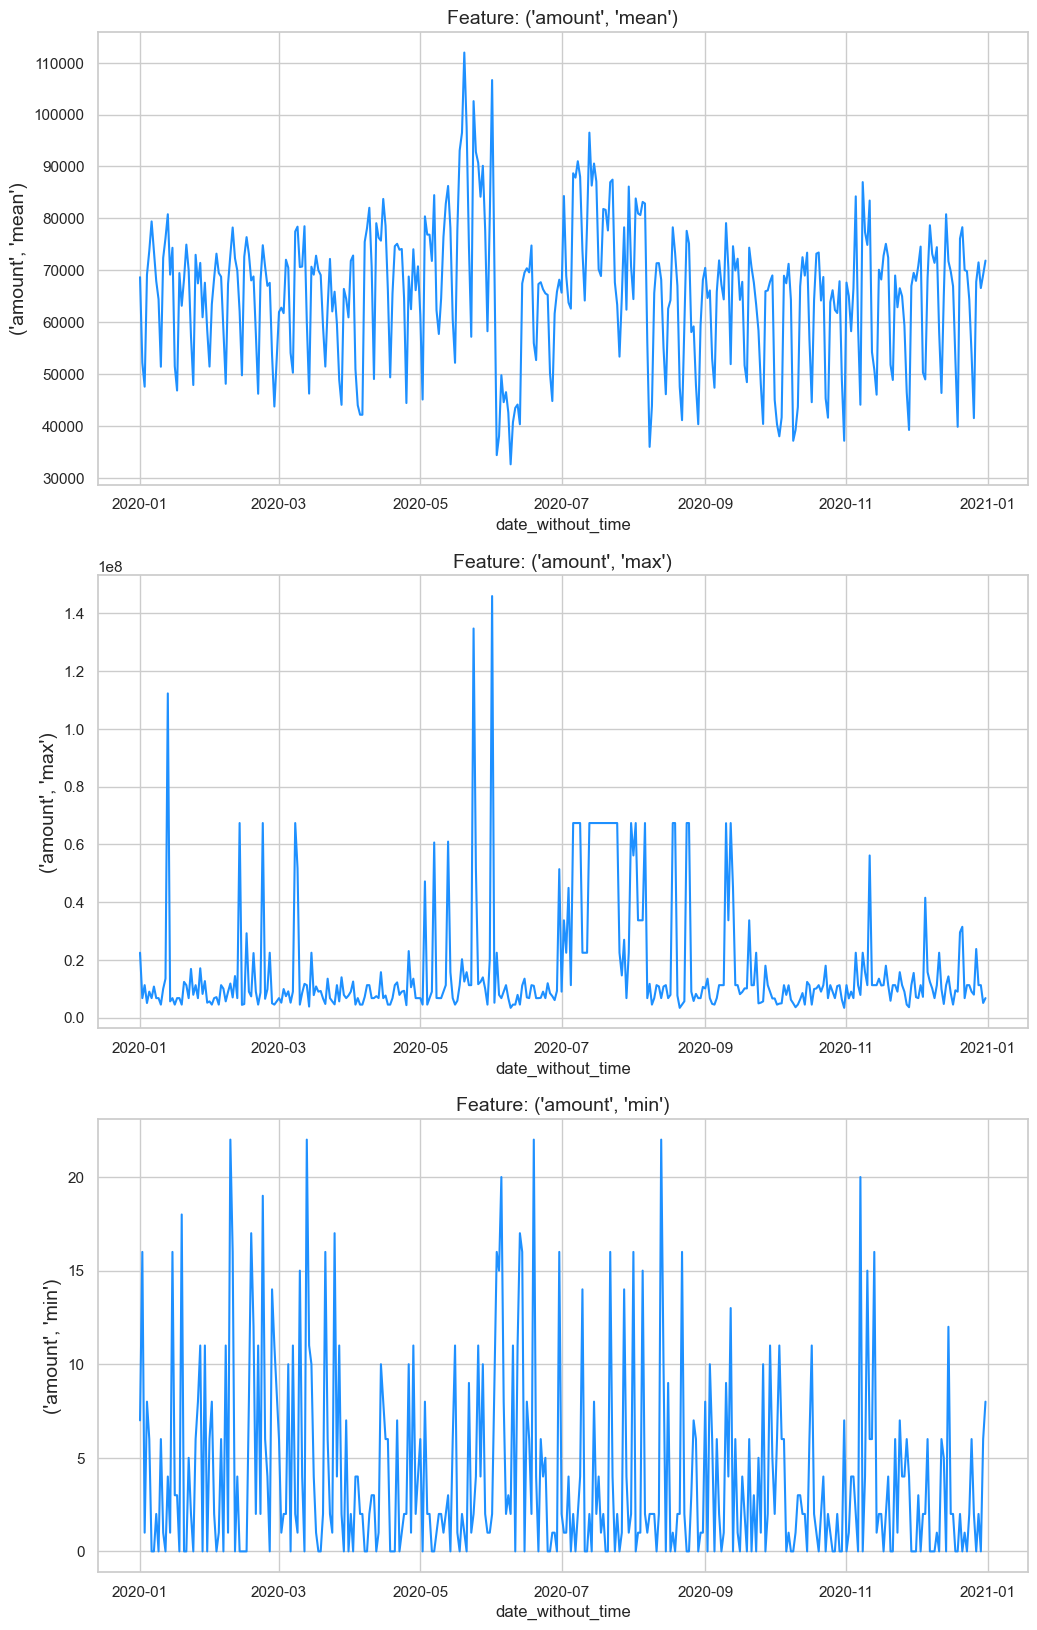

In [123]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

for i, column in enumerate(amount_describe.drop('date_without_time', axis=1).columns):
    sns.lineplot(x=amount_describe['date_without_time'], 
                 y=amount_describe[column], 
                 ax=ax[i], 
                 color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
#     ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])     

In [124]:
from statsmodels.tsa.stattools import adfuller

for column in amount_describe.drop(['date_without_time'], axis = 1).columns:
    result = adfuller(amount_describe[column].values)
    print('{} amount:'.format(column[1]))
    if result[1] < 0.05:
        print('Нулевая гипотеза отвергается, ряд стационарен')
        print('p-value = ' + str(result[1]))
    else:
        print('Нулевая гипотеза не отвергается, ряд не стационарен')
        print('p-value = ' + str(result[1]))

mean amount:
Нулевая гипотеза отвергается, ряд стационарен
p-value = 0.0007712157073913985
max amount:
Нулевая гипотеза отвергается, ряд стационарен
p-value = 0.018233791229995105
min amount:
Нулевая гипотеза отвергается, ряд стационарен
p-value = 3.3198447588855276e-30


/var/folders/15/mm6_3b9s0nb64nzlcf3sft6c0000gn/T/ipykernel_1087/1380340154.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for column in amount_describe.drop(['date_without_time'], axis = 1).columns:


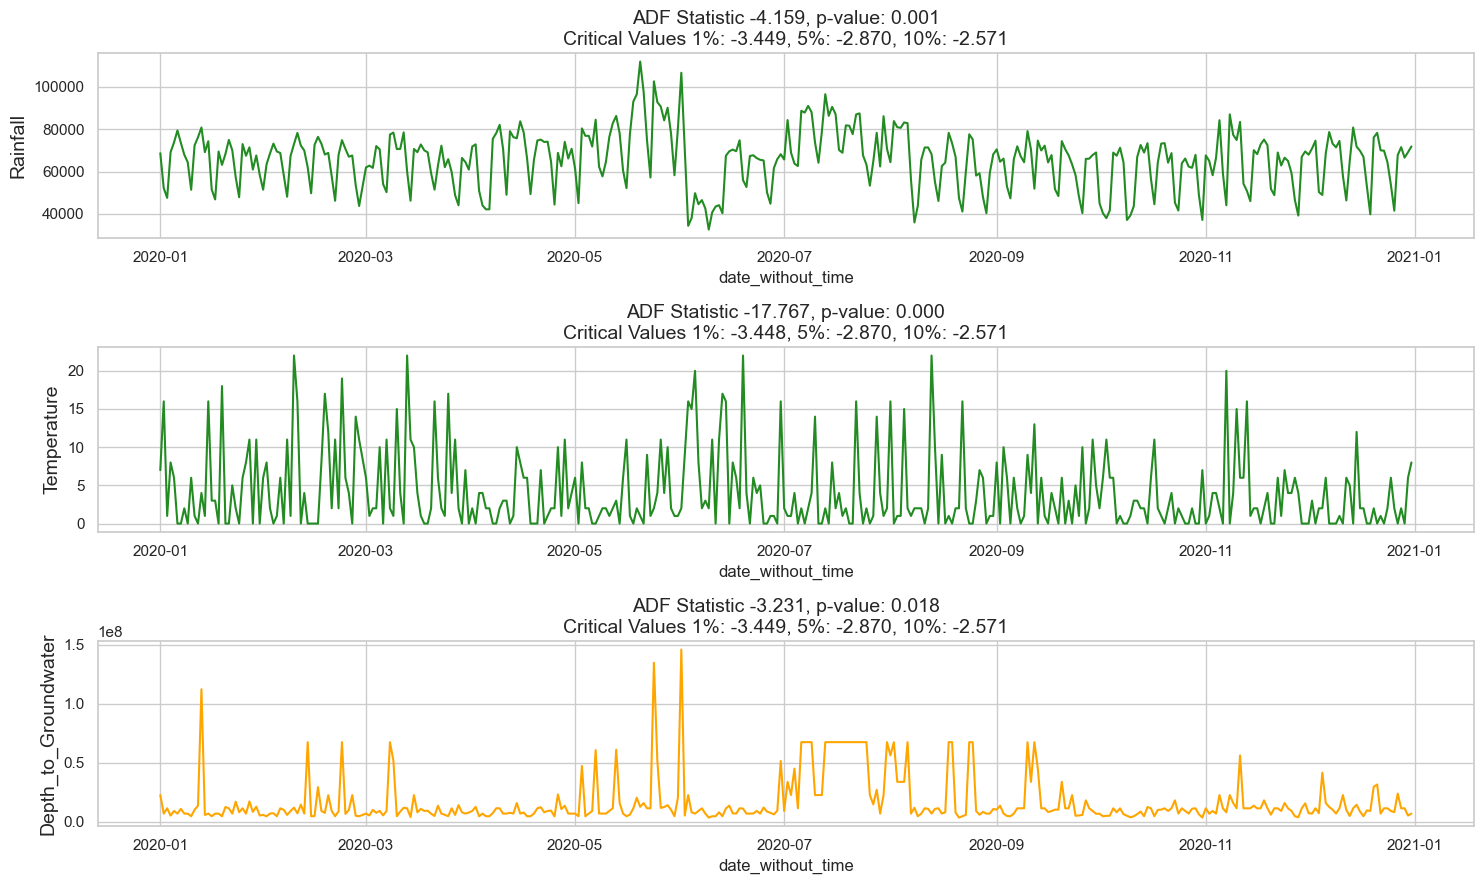

In [125]:
#### Визуализация результатов теста Дики-Фуллера

f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=amount_describe['date_without_time'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(amount_describe[('amount', 'mean')].values, 'Rainfall', ax[0])
visualize_adfuller_results(amount_describe[('amount', 'min')].values, 'Temperature', ax[1])
visualize_adfuller_results(amount_describe[('amount', 'max')].values, 'Depth_to_Groundwater', ax[2])

plt.tight_layout()
plt.show()

In [ ]:
# Логарифмирование временного ряда

# for column in amount_describe.drop(['date_without_time'], axis = 1).columns:
#     curr = np.log(abs(amount_describe[column]))
#     f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
#     visualize_adfuller_results(curr, 'log {}'.format(column[1]), ax[0])
#     sns.distplot(amount_describe[column], ax=ax[1])

In [ ]:
# First Order Differencing

ts_diff = np.diff(amount_describe[('amount', 'mean')])
amount_describe['mean_amount_diff'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(amount_describe['mean_amount_diff'], 'Differenced mean amount', ax)

In [ ]:
# Работа с признаками

In [ ]:
# data_analysis_ts['year'] = pd.DatetimeIndex(data_analysis_ts['date']).year
# data_analysis_ts['month'] = pd.DatetimeIndex(data_analysis_ts['date']).month
# data_analysis_ts['day'] = pd.DatetimeIndex(data_analysis_ts['date']).day
# data_analysis_ts['day_of_year'] = pd.DatetimeIndex(data_analysis_ts['date']).dayofyear
# data_analysis_ts['week_of_year'] = pd.DatetimeIndex(data_analysis_ts['date']).weekofyear
# data_analysis_ts['quarter'] = pd.DatetimeIndex(data_analysis_ts['date']).quarter

In [ ]:
#3.1 Encoding Cyclical Features

In [ ]:
#3.2 TimeSeries Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(amount_describe[('amount', 'mean')], period=52, model='additive', extrapolate_trend='freq')
amount_describe[f"amount_mean_trend"] = decomp.trend
amount_describe[f"amount_mean_seasonal"] = decomp.seasonal

In [ ]:
amount_describe.sort_index(inplace = True)

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))
    
res = seasonal_decompose(amount_describe[('amount', 'mean')],
                         period = 180,
                         model='additive', 
                         extrapolate_trend='freq'
                        )

ax[0].set_title('Decomposition of {}'.format(('amount', 'mean')), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
    
res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
#3.3 Lag

# weeks_in_month = 4

# for column in core_columns:
#     df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
#     df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
#     df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
#     df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
#     df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

In [ ]:
# 4. Exploratory Data Analysis 

# f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
# f.suptitle('Seasonal Components of Features', fontsize=16)

# for i, column in enumerate(core_columns):
#     sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
#     ax[i].set_ylabel(ylabel=column, fontsize=14)
#     ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
# plt.tight_layout()
# plt.show()

In [ ]:
# f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# corrmat = df[core_columns].corr()

# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
# ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

# shifted_cols = [
#     'depth_to_groundwater_seasonal',         
#     'temperature_seasonal_shift_b_2m',
#     'drainage_volume_seasonal_shift_2m', 
#     'river_hydrometry_seasonal_shift_3m'
# ]
# corrmat = df[shifted_cols].corr()

# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
# ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


# plt.tight_layout()
# plt.show()

In [ ]:
### 4.1 Autocorrelation Analysis

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(amount_describe[('amount', 'mean')])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(amount_describe[('amount', 'mean')], lags=100, ax=ax[0])
plot_pacf(amount_describe[('amount', 'mean')], lags=100, ax=ax[1])

plt.show()

In [ ]:
## 5. Modeling

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = amount_describe.index
y = amount_describe[('amount', 'mean')]

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
## 5.1 Models for Univariate Time Series

In [ ]:
train_size = int(0.85 * len(amount_describe))
test_size = len(amount_describe) - train_size

univariate_df = amount_describe[[('amount', 'mean')]].copy()

train = univariate_df.iloc[:train_size, :]

x_train, y_train = univariate_df.loc[:train_size].index, pd.DataFrame(univariate_df.iloc[:train_size, 0])
x_valid, y_valid = univariate_df.loc[train_size:].index, pd.DataFrame(univariate_df.iloc[train_size:, 0])

print(len(train), len(x_valid))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(55)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))
print('MAE: {}'.format(score_mae))

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid, y=y_valid[('amount', 'mean')], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Mean amount', fontsize=14)

plt.show()